Question:


Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.


In [1]:
# ## Import the necessary libraries:-

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

import pickle
import logging 
import traceback

In [2]:
## Load the dataset using pandas:

df = pd.read_csv(r"F:\Ineuron DS\Assignment\instagram_reach.csv")

In [3]:
## Checking top 5 rows

df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [51]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [52]:
## Checking Null Values

df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [4]:
# Droping null values 

df.dropna(inplace = True)

In [5]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(94, 8)

In [55]:
## Checking All Columns name present in Dataset 

df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [6]:
# Remove unnecessary columns

df.drop(['Unnamed: 0','S.No'],axis = 1,inplace = True)

In [7]:
# Checking for duplicates 

df[df.duplicated()]

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes


In [114]:
df

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


### Exploratory Data Analysis

In [8]:
df['Time since posted'] = df['Time since posted'].str.split(" ").str[0].astype('int')

Type casted 'Time since posted' to int and removed hours 

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Followers', ylabel='Density'>

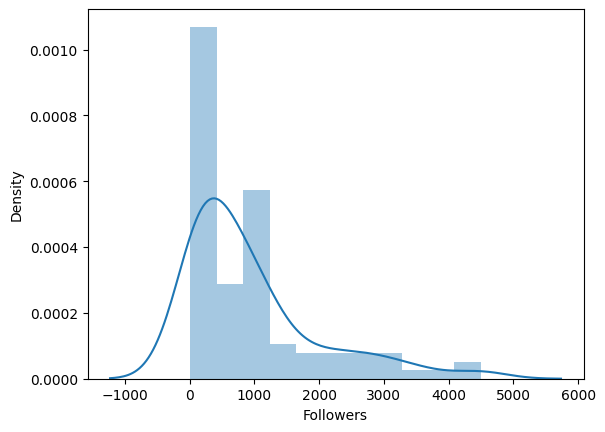

In [61]:
# Distribution between features 

sns.distplot(df['Followers'])

The 'Followers' Distribution is right-skewed, Most of the account has 0 to 2000 followers

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Likes', ylabel='Density'>

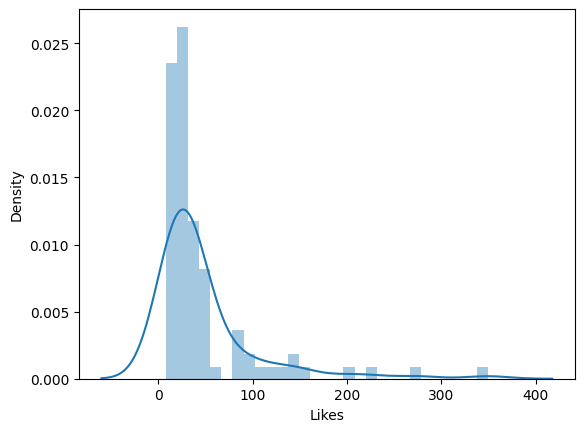

In [62]:
sns.distplot(df['Likes'])

The 'Likes' Distribution is right-skewed, Most of the account has 0 to 100 Likes

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Time since posted', ylabel='Density'>

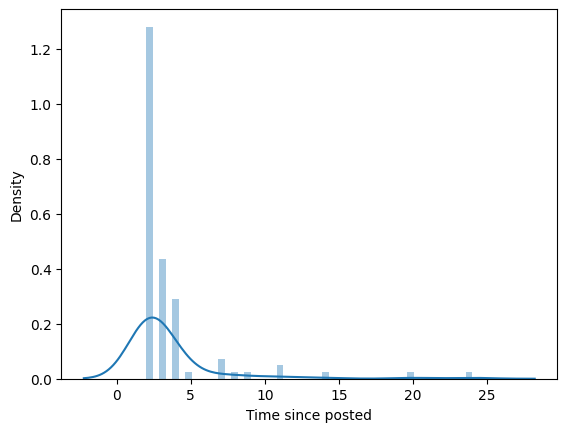

In [63]:
sns.distplot(df['Time since posted'])

The 'Time Since Posted' Distribution is right-skewed, Most of the likes are between 0 to 5 hrs.

<Axes: >

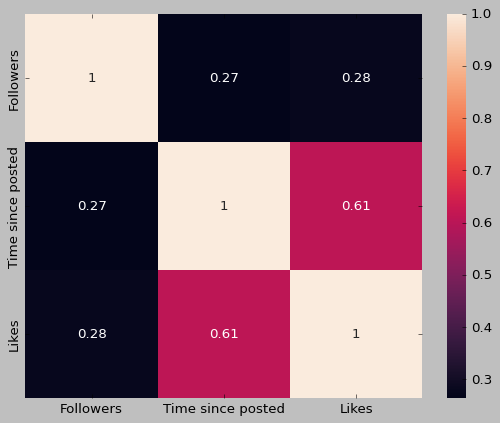

In [116]:
# Correlation between features 

sns.heatmap(df.corr(),annot = True)

<Axes: xlabel='Followers', ylabel='Likes'>

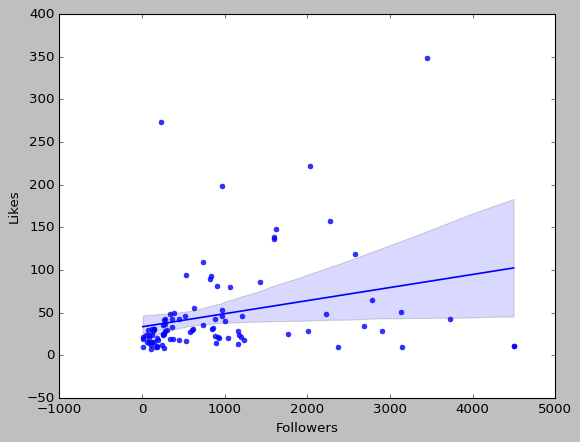

In [95]:
# Relationship between likes and Followers

sns.regplot(x = df['Followers'],y = df['Likes'])

<Axes: xlabel='Followers', ylabel='Time since posted'>

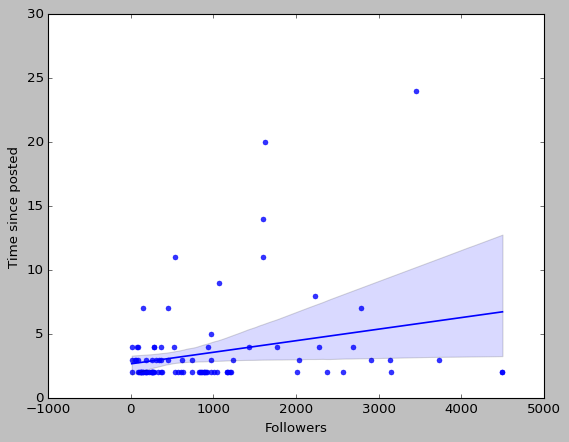

In [94]:
# Relationship between Time since posted  and Followers

sns.regplot(x = df['Followers'],y = df['Time since posted'])

<Axes: xlabel='Likes', ylabel='Time since posted'>

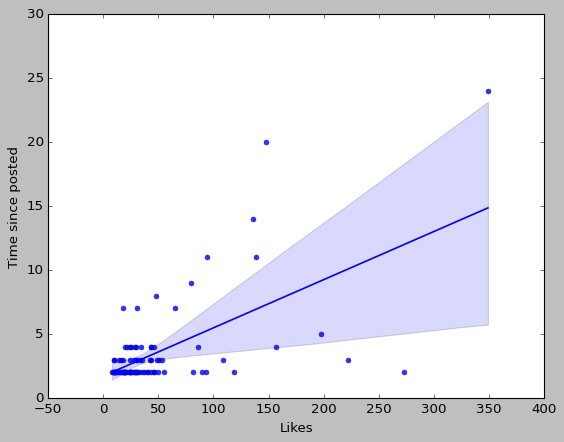

In [93]:
# Relationship between Time since posted  and Likes

sns.regplot(x = df['Likes'],y = df['Time since posted'])

Caption variables - using wordcloud

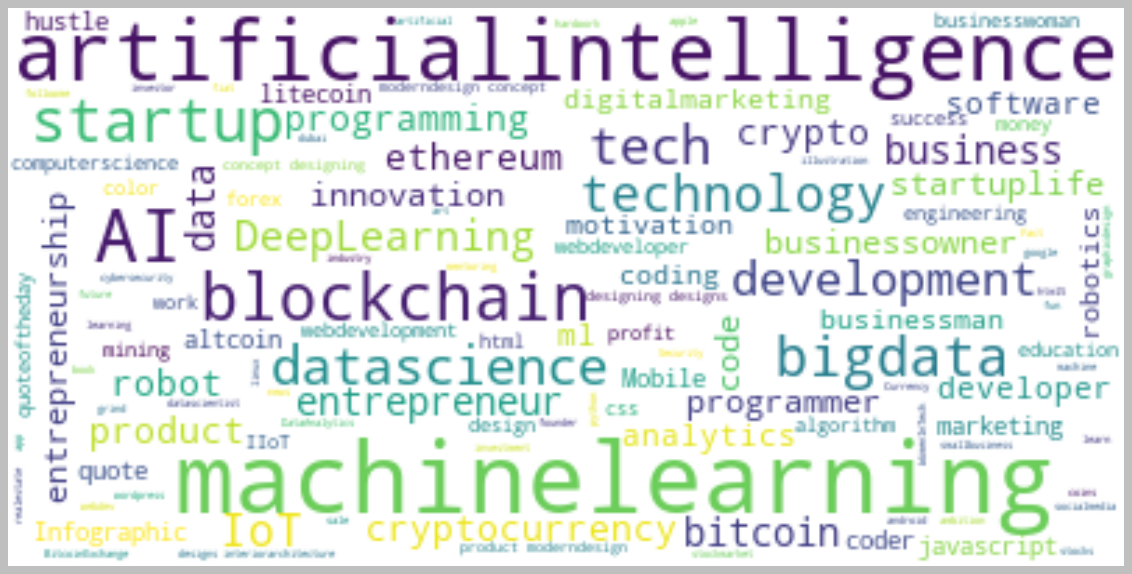

In [82]:
text = " ".join(i for i in df['Hashtags'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The words like 'machine Learning', 'artificialintelligence', 'blockchain', 'AI' are frequently used in Hastags

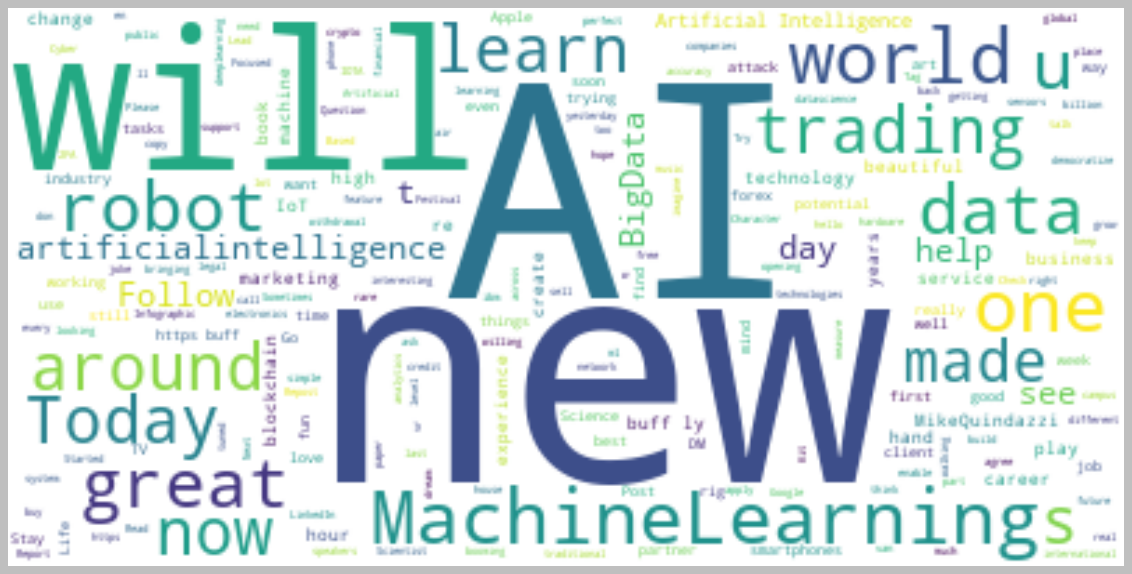

In [88]:
text = " ".join(i for i in df['Caption'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words like 'machine Learning', 'new', 'will', 'AI' are frequently used in Caption

In [9]:
# Remove unnecessary columns

df.drop(['USERNAME','Caption','Hashtags'],axis = 1,inplace = True)

In [10]:
# Standardization

scalar = StandardScaler()

for i in df.columns:
    feature = np.array(df[i]).reshape(-1,1)
    
    feature_scaled = scalar.fit_transform(feature)
    df[i] = feature_scaled.reshape(-1)

In [11]:
# Independence and Dependence variabble

X = np.array(df['Followers']).reshape(-1,1)
y = df[['Time since posted','Likes']].values

In [12]:
# train test split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# Declaring models and its parameters for training


models = {"Linear Regression" : LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Gradient Boosting": GradientBoostingRegressor(),
          "AdaBoost Regressor": AdaBoostRegressor(),
          "XgBosst": XGBRegressor(),
          "SVR": SVR()
            }

parameters = {"Linear Regression":{},
              "Decision Tree":{
                  "criterion":['squared_error','friedman_mse','absolute_error'],
                  'min_samples_split':[2,4],
                  'min_samples_leaf':[1,2],
                  'random_state':[42]
              },
              "Random Forest":{
                  'n_estimators':[100,123,156,173],
                  'min_samples_split':[2,4],
                  'min_samples_leaf':[1,2],
                  'random_state':[42]
              },
              "Gradient Boosting":{
                  'learning_rate':[0.1,0.01,0.001,0.02],
                  'n_estimators':[100,123,156,173],
                  'min_samples_split':[2,4],
                  'min_samples_leaf':[1,2],
                  'random_state':[42],
                  'alpha':[0.3,0.5,0.9]
                  
              },
              "AdaBoost Regressor":{
                  "n_estimators":[100,123,156,173],
                  'learning_rate':[0.1,0.01,0.001,0.02],
                  'random_state':[42]
                  
              },
              "XgBosst":{
                  'max_depth': [2,4,5], 
                  'eta': [.0001,.001,0.01,.1],
                  'alpha' : np.arange(0.1,1,0.1),
                  'n_estimators':[225,250,257,280], 
                  'random_state':[30]
              },
              
              "SVR":{
                  'C':[1.0,1.3,1.9,2,6]
                  }
              }

In [151]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = parameters

    def eval_model(self):
        
        try:
        
            report = {}

            model_config = {}

            for i in models:

                model_i = models[i]
            
                mod_el = GridSearchCV(model_i,cv = 5, param_grid = parameters[i])
                
                model = MultiOutputRegressor(mod_el)

                model.fit(X_train,y_train)

                y_train_pred = model.predict(X_train)

                y_test_pred = model.predict(X_test)

                train_model_score = r2_score(y_train,y_train_pred)

                test_model_score = r2_score(y_test,y_test_pred)
                
                report[i] = [train_model_score,test_model_score]
 
                model_config[i] = model
                
                logging.info('Model training completed')

            return report,model_config
        
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())

In [152]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = parameters)

report,model_config = model_trained.eval_model()

model_trained.save_model('model.pickle',best_model_config)

In [123]:
# Model Selection 

report_s = []

for i in range(len(report)):
    model = list(report.keys())[i]
    train_score = list(report.values())[i][0]
    test_score = list(report.values())[i][1]
    report_s.append((model,train_score,test_score))
    
report = pd.DataFrame(report_s,columns = ['model','train_score','test_score'])

best_model_name = report[report['test_score'] == max(report['test_score'])]['model'].values[0]
best_model_score = report[report['test_score'] == max(report['test_score'])]['test_score'].values[0]
best_model_config = model_config[best_model_name]


# AdaBoost has the highest score among all the other models with a train_score of 0.5

In [153]:
report_s

[('Linear Regression', 0.057005743405466325, 0.1533995733537873),
 ('Decision Tree', 0.33866201999032414, 0.05947973360808445),
 ('Random Forest', 0.39859380040454295, 0.1871919063476345),
 ('Gradient Boosting', 0.07305717726765132, 0.10415305215614395),
 ('AdaBoost Regressor', 0.5113737911623731, 0.314371751698089),
 ('XgBosst', 0.10284913281930647, -0.1429833485386699),
 ('SVR', -0.009779682617804264, -0.03294521034688164)]

In [143]:
report

,model,train_score,test_score
0,Linear Regression,0.057006,0.153400
1,Decision Tree,0.338662,0.059480
2,Random Forest,0.398594,0.187192
3,Gradient Boosting,0.073057,0.104153
4,AdaBoost Regressor,0.511374,0.314372
5,XgBosst,0.102849,-0.142983
6,SVR,-0.009780,-0.032945
